# L3: Text clustering and topic modelling

Text clustering groups documents in such a way that documents within a group are more &lsquo;similar&rsquo; to other documents in the cluster than to documents not in the cluster. The exact definition of what &lsquo;similar&rsquo; means in this context varies across applications and clustering algorithms.

In this lab you will experiment with both hard and soft clustering techniques. More specifically, in the first part you will be using the $k$-means algorithm, and in the second part you will be using a topic model based on the Latent Dirichlet Allocation (LDA).

## Hard clustering data set

The raw data for the hard clustering part of this lab is a collection of product reviews. We have preprocessed the data by tokenization and lowercasing.

In [2]:
import pandas as pd
import bz2

with bz2.open("reviews.json.bz2") as source:
    df = pd.read_json(source)

When you inspect the data frame, you can see that there are three labelled columns: `category` (the product category), `sentiment` (whether the product review was classified as &lsquo;positive&rsquo; or &lsquo;negative&rsquo; towards the product), and `text` (the space-separated text of the review).

In [3]:
df.head()

,category,sentiment,text
0,music,neg,i bought this album because i loved the title ...
1,music,neg,i was misled and thought i was buying the enti...
2,books,neg,"i have introduced many of my ell , high school..."
3,books,pos,anything you purchase in the left behind serie...
4,dvd,pos,"i loved these movies , and i cant wiat for the..."


## Problem 1: K-means clustering

Your first task is to cluster the product review data using a tf–idf vectorizer and a $k$-means clusterer.

Start by doing the vectorization. In connection with vectorization, you should also filter out standard English stop words. While you could use [spaCy](https://spacy.io/) for this task, here it suffices to use the word list implemented in [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html).

In [4]:
# TODO: Enter code here to vectorize the data
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english',use_idf=True)
reviews = tfidf_vectorizer.fit_transform(df["text"])
#print(vectorizer.get_feature_names())

Test your vectorization by running the following code cell:

In [5]:
reviews.shape

(11914, 46619)

If you used the English stop word list from scikit-learn, then the resulting vocabulary should have 46,619 entries.

Next, cluster the vectorized data. Before doing so, you should read the documentation of the [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) class, which is scikit-learn&rsquo;s implementation of the $k$-means algorithm. As you can see, this class has several parameters that you can tweak. For now, the only parameter that you will have to set is the number of clusters. We recommend that you choose $k=3$.

**Tip:** Training $k$-means models will take some time. To speed things up, you can use the `n_init` parameter to control the number of times that the clustering is re-computed with different initial values. The default value for this parameter is 10; here and in the rest of this lab, you may want to set this to a lower value.

In [15]:
# TODO: Enter code here to cluster the vectorized data
from sklearn.cluster import KMeans, MiniBatchKMeans
kmeans3 = KMeans(n_clusters=3,n_init=8,n_jobs=-1).fit(reviews)

To sanity-check your clustering, create a bar plot with the number of documents per cluster.

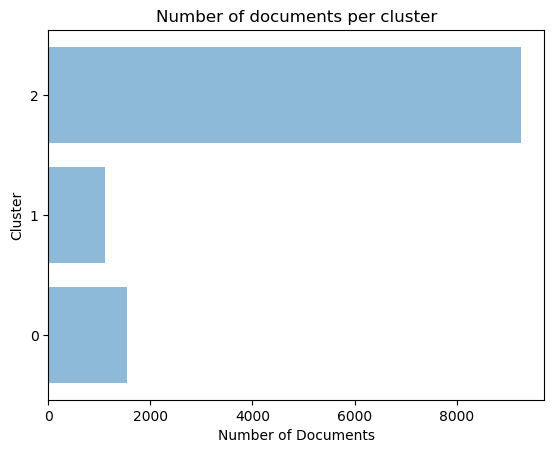

In [16]:
# TODO: Enter code here to produce a bar plot of the cluster size
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

cluster_labels = pd.DataFrame(kmeans3.labels_)


objects = ('0', '1', '2')
y_pos = np.arange(len(objects))
counts = cluster_labels.groupby(0).size().tolist()

plt.barh(y_pos, counts, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Number of Documents')
plt.ylabel('Cluster')
plt.title('Number of documents per cluster')

plt.show()

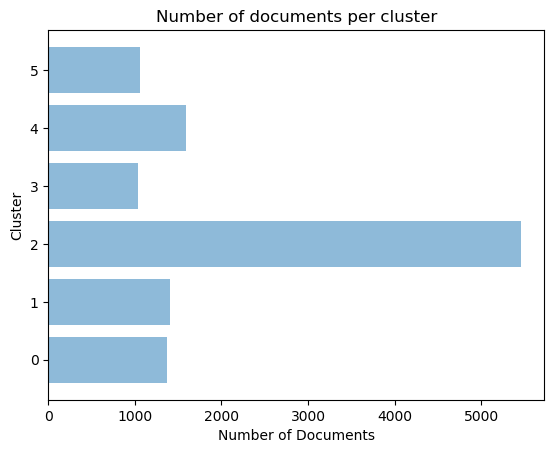

In [17]:
kmeans6 = KMeans(n_clusters=6,n_init=8,n_jobs=-1).fit(reviews)
cluster_labels2 = pd.DataFrame(kmeans6.labels_)
objects2 = ('0', '1', '2', '3', '4', '5')
y_pos2 = np.arange(len(objects2))
counts2 = cluster_labels2.groupby(0).size().tolist()

plt.barh(y_pos2, counts2, align='center', alpha=0.5)
plt.yticks(y_pos2, objects2)
plt.xlabel('Number of Documents')
plt.ylabel('Cluster')
plt.title('Number of documents per cluster')

plt.show()

Note that sizes may vary considerable between clusters and among different random seeds.

## Problem 2: Summarize clusters

Once you have a clustering, you can try to see whether it is meaningful. One useful technique in that context is to generate a **summary** for each cluster by extracting the $n$ highest-weighted terms from the centroid of each cluster. Your next task is to implement this approach.

**Hint:** You will need to construct an &lsquo;inverted vocabulary&rsquo; that allows you to map from the index of a term back to the original term.

In [18]:
# TODO: Enter code here to compute the cluster summaries and print them
n = int(input("Enter your value: "))
centroids3 = pd.DataFrame(kmeans3.cluster_centers_).transpose()
for i in range(centroids3.shape[1]): 
    terms3 = dict(zip(tfidf_vectorizer.get_feature_names()
                      ,centroids3.iloc[:,i]))
    sortedterms3 = sorted(terms3.items(),key = lambda x:x[1],reverse=True)
    print("\n")
    print("The cluster number",i+1)
    print(pd.DataFrame(sortedterms3[:n]).rename(
        columns={0:"term",1:"Centroid"}))

Enter your value: 5


The cluster number 1
     term  Centroid
0    book  0.149350
1    quot  0.057593
2    read  0.043491
3   books  0.024154
4  author  0.020677


The cluster number 2
       term  Centroid
0    camera  0.198927
1      lens  0.068496
2  pictures  0.060990
3     canon  0.036878
4   digital  0.034205


The cluster number 3
      term  Centroid
0     like  0.018483
1  product  0.017770
2    movie  0.017492
3    great  0.017387
4     just  0.017194


In [19]:
# Clustering with k = 6
n = int(input("Enter your value: "))
centroids6 = pd.DataFrame(kmeans6.cluster_centers_).transpose()
for i in range(centroids6.shape[1]): 
    terms6 = dict(zip(tfidf_vectorizer.get_feature_names()
                      ,centroids6.iloc[:,i]))
    sortedterms6 = sorted(terms6.items(),key = lambda x:x[1],reverse=True)
    print("\n")
    print("The cluster number",i+1)
    print(pd.DataFrame(sortedterms6[:n]).rename(
        columns={0:"term",1:"Centroid"}))

Enter your value: 5


The cluster number 1
      term  Centroid
0     book  0.164837
1     read  0.047870
2    books  0.026839
3   author  0.022579
4  reading  0.020131


The cluster number 2
       term  Centroid
0  software  0.062729
1   program  0.053192
2   product  0.037677
3   version  0.037543
4  computer  0.032944


The cluster number 3
      term  Centroid
0  product  0.020272
1    great  0.016339
2     good  0.015478
3      use  0.015089
4     like  0.014937


The cluster number 4
     term  Centroid
0   movie  0.151871
1    film  0.072057
2  movies  0.025307
3    like  0.023497
4   story  0.023172


The cluster number 5
    term  Centroid
0  album  0.079911
1     cd  0.074489
2  music  0.050926
3  songs  0.049756
4   quot  0.042603


The cluster number 6
       term  Centroid
0    camera  0.205580
1      lens  0.067620
2  pictures  0.063172
3     canon  0.035973
4   digital  0.033513


Once you have computed the cluster summaries, discuss their quality. Is it clear what the reviews in a given cluster are about? Which clusters are clearest? Which are less clear? Do the cluster summaries contain any unexpected terms? What happens if you re-cluster with, say, $k=6$?

*The quality of clustering with 3 clusters is low as 2 out 3 clusters are ambiguous about the content, mixing up media-types such as books,movie,cd,album in cluster 3 and product/software/program in cluser 1. Only cluster 2 is of fair quality with camera being the main content.
Unexpected terms such as like,use,does are present with high centroid values.
The quality of clustering with 6 clusters improves, as all the clusters now are more clear and have well defined boundaries such as books , music and movies are clustered separately. This vastly improves the quality.*

## Problem 3: Tune the k-means algorithm

A major limitation of the $k$-means algorithm is that one has to manually set the value for $k$, the number of clusters. One heuristic that can help you with this is the [Elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)). Your next task is to implement this method to see whether it allows you to find a better value for $k$.

To follow the elbow method, you should plot different values of $k$ against the **inertia** (sums of squared distances between documents and closest centroids) of the fitted $k$-means model, and pick the $k$ at the &lsquo;elbow point&rsquo; of the resulting graph. Test cluster sizes between 1 and 9.

**Note that this will take a while.**

In [20]:
# TODO: Enter code here to generate the plot for the elbow method
elbow_inertia = []
for x in range(1,10):
    kmeans = KMeans(n_clusters=x,n_init=8,n_jobs=-1).fit(reviews)
    inertias = kmeans.inertia_
    elbow_inertia.append(inertias)
print(elbow_inertia)

[11764.202585909865, 11696.56159234875, 11655.854642045837, 11613.389689605778, 11578.79141795149, 11549.349572578383, 11517.907226042009, 11497.824056468986, 11470.81363329123]


<function matplotlib.pyplot.show(*args, **kw)>

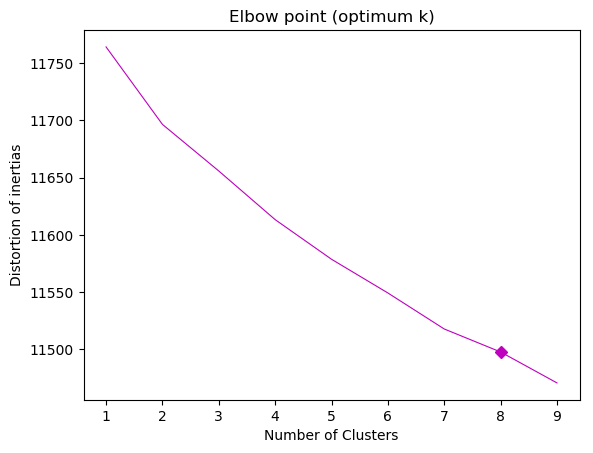

In [21]:
import matplotlib.pyplot as plt
#Elbow method
plt.plot(range(1,10),elbow_inertia
         ,marker = 'D',markevery=[7]
         ,color = 'm',linewidth = 0.8)
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion of inertias')
plt.title('Elbow point (optimum k)')
plt.show

Once you have the diagram, can you see a pronounced &lsquo;elbow point&rsquo;? Discuss your findings in a short text.

*A pronounced elbow point is not present which is unexpected. A choice of higher number of max k value may present k=8 as the elbow point which has a low enough distortion value which is linearly reducing with increase in number of clusters*

## Problem 4: Compare clusterings using the Rand index

In some scenarios, you may have gold-standard class labels available for at least a subset of your documents. In these cases you can compute the **Rand index** of a clustering, and use this measure to compare the quality of different clusterings.

To compute the Rand index, we view a clustering as a binary classifier on pairs of documents. The classifier predicts &lsquo;positive&rsquo; if and only if the two documents belong to the same cluster. The (non-normalized) Rand index of the clustering is the accuracy of this classifier relative to a reference in which a document pair belongs to the &lsquo;positive&rsquo; class if and only if the two documents in the pair have the same gold-standard class label.

Compare a clustering with $k=3$ clusters to a second clustering with $k=6$ clusters. As your evaluation data, use the first 500 documents from the original data set along with their gold-standard categories (from the `category` column). What do you observe? How do you interpret your observations? What arguments can you find against the Rand index as a measure for comparing clusterings?

In [22]:
# TODO: Enter code here to compute the Rand indices for the two clusterings
from sklearn import metrics
sample = df[0:500]
sample_reviews = tfidf_vectorizer.fit_transform(sample["text"])
labels_true = sample.category.tolist()
kmeans3_sample = KMeans(n_clusters=3
                        ,n_init=8,n_jobs=-1).fit(sample_reviews)
kmeans6_sample = KMeans(n_clusters=6
                        ,n_init=8,n_jobs=-1).fit(sample_reviews)

In [23]:
#part of the function implemented here is referred from the link given below:
#https://stackoverflow.com/questions/49586742/rand-index-function-clustering-performance-evaluation
from scipy.special import comb
from itertools import combinations
import numpy as np

def rand_score (labels_true, labels_pred):
    my_pair = list(combinations(range(len(labels_true)), 2)) #create list of all combinations with the length of labels.
    def is_equal(x):
        return (x[0]==x[1])
    my_a = 0
    my_b = 0
    for i in range(len(my_pair)):
            if(is_equal((labels_true[my_pair[i][0]],labels_true[my_pair[i][1]])) == is_equal((labels_pred[my_pair[i][0]],labels_pred[my_pair[i][1]])) 
               and is_equal((labels_pred[my_pair[i][0]],labels_pred[my_pair[i][1]])) == True):
                my_a += 1
            if(is_equal((labels_true[my_pair[i][0]],labels_true[my_pair[i][1]])) == is_equal((labels_pred[my_pair[i][0]],labels_pred[my_pair[i][1]])) 
               and is_equal((labels_pred[my_pair[i][0]],labels_pred[my_pair[i][1]])) == False):
                my_b += 1
    my_denom = comb(len(labels_true),2)
    ri = (my_a + my_b) / my_denom
    return ri

In [24]:
#rand score for k=3
labels_pred = kmeans3_sample.predict(sample_reviews).tolist()
score = metrics.adjusted_rand_score(labels_true,labels_pred)
print("The rand index is",round(rand_score(labels_true, labels_pred)*100,2),"%")
print("The adjusted rand score is",round(score*100,2),"%")

The rand index is 62.8 %
The adjusted rand score is 20.45 %


In [25]:
#rand score for k=6
labels_pred = kmeans6_sample.predict(sample_reviews).tolist()
score = metrics.adjusted_rand_score(labels_true,labels_pred)
print("The rand index is",round(rand_score(labels_true, labels_pred)*100,2),"%")
print("The adjusted rand score is",round(score*100,2),"%")

The rand index is 78.6 %
The adjusted rand score is 33.55 %


*The rand index is calculated as $R=\frac{a+b}{\begin{pmatrix} n \\ 2\end{pmatrix}}$, where a is the number of times a pair of elements is grouped together by the clustering methods and b is when they are not. n refers to the number of elements present.
Here, we compare the given categories i.e true labels to the clustering with k=3,6; The adjusted rand index is the rand index adjusted for chance is between -1 and 1, which in our case shows that k=6 is effective.
ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)
Disadvantages of Rand index:
-scale from 0 to 1 so it cannot be compared with a random set, ARI between -1 and 1 proves to useful here
-accountability due to overlap of pairs is absent, can be taken care with ARI
-High RI but low ARI, when there are many clusters, there is a higher chance that a pair of items in both sets are in different clusters.*

## Topic modelling data set

The data set for the topic modelling part of this lab is the collection of all [State of the Union](https://en.wikipedia.org/wiki/State_of_the_Union) addresses from the years 1975–2000. These speeches come as a single text file with one sentence per line. The following code cell prints the first 5 lines from the data file:

In [26]:
with open("sotu_1975_2000.txt") as source:
    for i, line in enumerate(source):
        print(line.rstrip())
        if i >= 5:
            break

mr speaker mr vice president members of the 94th congress and distinguished guests
twenty six years ago a freshman congressman a young fellow with lots of idealism who was out to change the world stood before sam rayburn in the well of the house and solemnly swore to the same oath that all of you took yesterday an unforgettable experience and i congratulate you all
two days later that same freshman stood at the back of this great chamber over there someplace as president truman all charged up by his single handed election victory reported as the constitution requires on the state of the union
when the bipartisan applause stopped president truman said i am happy to report to this 81st congress that the state of the union is good our nation is better able than ever before to meet the needs of the american people and to give them their fair chance in the pursuit of happiness it is foremost among the nations of the world in the search for peace
today that freshman member from michigan stan

## Problem 5: Train a topic model

Your first task on the topic modelling data is to train an LDA model. For this task you will be using [spaCy](https://spacy.io/) and the [gensim](https://radimrehurek.com/gensim/) topic modelling library.

Start by preprocessing the data using spaCy. Given that the data set for this problem is rather small, you do not have to exclude any components from the standard pipeline. Filter out stop words, non-alphabetic tokens, and tokens less than 3 characters in length. Store the documents as a nested list where the first level of nesting corresponds to the sentences and the second level corresponds to the tokens in each sentence.

In [27]:
# TODO: Replace the following lines with your own code for preprocessing the documents
import spacy
nlp = spacy.load("en_core_web_sm",disable=["tagger", "parser","ner"])
def preprocess(text): 
    token_list = []
    for word in text:
        for token in nlp(word):
            if(token.is_stop):
                break
            elif(token.is_alpha!=True):
                break
            elif(len(token) <= 2):
                break
            token_list.append(token.text)    
    return token_list

docs = list()
with open("sotu_1975_2000.txt") as source:
    documents = [line.split() for line in source]
    for text in documents:
        docs.append(preprocess(text))
        

#            if token.is_stop == False and token.is_alpha == True:
#                if token.lemma_.isalpha():
#                    token_list.append(token.text)        

Test your preprocessing by running the following cell:

In [28]:
" ".join(docs[42])

'reduce oil imports million barrels day end year million barrels day end'

You should get the following output:

Once you have the list of documents, skim the section [Pre-process and vectorize the documents](https://radimrehurek.com/gensim/auto_examples/tutorials/run_lda.html#pre-process-and-vectorize-the-documents) of the gensim documentation to learn how to create the dictionary and the vectorized corpus representation required by gensim. (Note that you cannot use the standard scikit-learn pipeline in this case.) Then, write code to train an [LdaModel](https://radimrehurek.com/gensim/models/ldamodel.html) for $k=10$ topics, and using default values for all other parameters.

In [29]:
# TODO: Enter code here to train an LDA model
from gensim.corpora import Dictionary
from gensim.models import LdaModel
# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.5)

# Bag-of-words representation of the documents.
corpus = [dictionary.doc2bow(text) for text in docs]
model = LdaModel(corpus, num_topics=10)
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 705
Number of documents: 2898


In [41]:
#model.print_topics(num_topics=20, num_words=10)
for i,topic in model.show_topics(formatted=False,num_words= 10):
    print([dictionary[int(words[0])] for words in topic])

['children', 'america', 'work', 'welfare', 'people', 'let', 'child', 'years', 'care', 'parents']
['tax', 'middle', 'economic', 'peace', 'people', 'growth', 'work', 'american', 'rates', 'year']
['people', 'america', 'let', 'congress', 'world', 'new', 'american', 'year', 'time', 'nation']
['people', 'tax', 'children', 'americans', 'health', 'government', 'america', 'new', 'year', 'american']
['government', 'crime', 'year', 'congress', 'new', 'teachers', 'people', 'care', 'federal', 'years']
['new', 'congress', 'nuclear', 'president', 'medicare', 'government', 'members', 'world', 'fellow', 'american']
['america', 'new', 'year', 'children', 'century', 'work', 'tonight', 'world', 'people', 'americans']
['trade', 'new', 'american', 'work', 'america', 'nation', 'know', 'markets', 'challenge', 'world']
['years', 'year', 'new', 'million', 'budget', 'billion', 'congress', 'tax', 'national', 'support']
['security', 'social', 'america', 'americans', 'years', 'help', 'world', 'work', 'people', 'bes

Once you have a trained model, run the following cell to print the topics:

Inspect the topics. Do they make sense? Can you &lsquo;label&rsquo; each topic with a short description of what it is about? Do the topics contain any unexpected terms? Summarize your discussion in a short text.

*Child welfare,Peace in the middle east,american congress,american people's health,federal crime,nuclear threats,new century,trade and markets,budget and tax, social security. Unexpected terms are present in some of the topics such as 'medicare' along with 'nuclear' threat concerns, 'economic growth' with 'peace in the middle east'.*

## Problem 6: Monitoring a topic model for convergence

When learning an LDA model, it is important to make sure that the training algorithm has converged to a stable posterior distribution. One way to do so is to plot, after each training epochs(or &lsquo;pass&rsquo;, in gensim parlance) the log likelihood of the training data under the posterior. Your last task in this lab is to create such a plot and, based on this, to suggest an appropriate number of epochs.

To collect information about the posterior likelihood after each pass, we need to enable the logging facilities of gensim. Once this is done, gensim will add various diagnostics to a log file `gensim.log`.

In [38]:
import logging

logging.basicConfig(filename="gensim.log", format="%(asctime)s:%(levelname)s:%(message)s", level=logging.INFO)

The following function will parse the generated logfile and return the list of log likelihoods.

In [39]:
import re

def parse_logfile():
    matcher = re.compile("(-*\d+\.\d+) per-word .* (\d+\.\d+) perplexity")
    likelihoods = []
    with open("gensim.log") as source:
        for line in source:
            match = matcher.search(line)
            if match:
                likelihoods.append(float(match.group(1)))
    return likelihoods

Your task now is to re-train your LDA model for 50&nbsp;passes, retrieve the list of log likelihoods, and create a plot from this data.

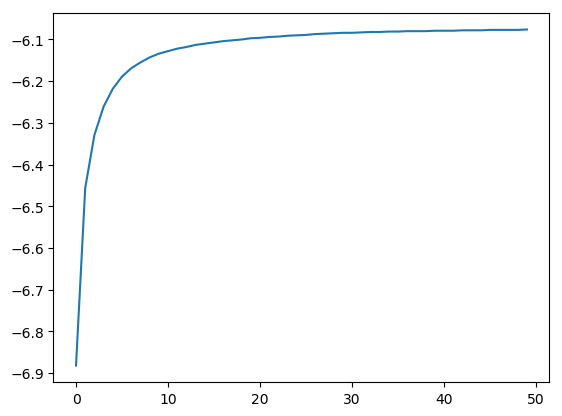

In [53]:
# TODO: Enter code here to generate the convergence plot
#clear previous code runs from the log file
with open('gensim.log', 'w'):
    pass
# Train LDA model.
ldamodel = LdaModel(corpus, num_topics=10, passes = 50)
plt.plot(parse_logfile())
#len(parse_logfile())

How do you interpret your plot? What would be a reasonable choice for the number of passes? Retrain your LDA model with that number and re-inspect the topics it finds. Do you consider the new topics to be &lsquo;better&rsquo; than the ones that you got from the 1-pass model in Problem&nbsp;5?

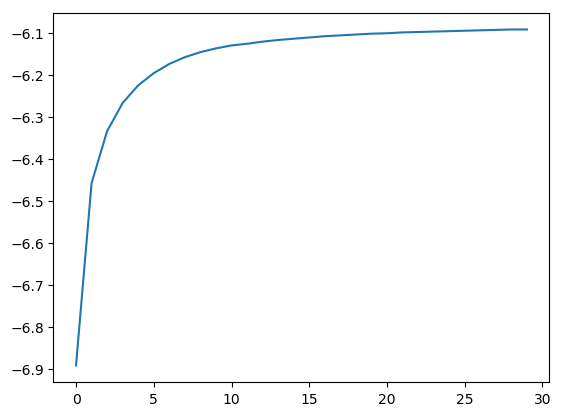

In [57]:
with open('gensim.log', 'w'):
    pass
ldamodel_optimum30 = LdaModel(corpus, num_topics=10, passes = 30)
plt.plot(parse_logfile())
#len(parse_logfile())

In [59]:
#topics in 50 pass model
for i,topic in ldamodel.show_topics(formatted=False,num_words= 10):
    print([dictionary[int(words[0])] for words in topic])

['america', 'world', 'people', 'freedom', 'nation', 'american', 'years', 'peace', 'time', 'country']
['world', 'nuclear', 'nations', 'united', 'states', 'soviet', 'peace', 'military', 'security', 'forces']
['jobs', 'years', 'new', 'tax', 'economy', 'growth', 'economic', 'private', 'inflation', 'cut']
['health', 'security', 'social', 'care', 'insurance', 'medicare', 'americans', 'system', 'year', 'bipartisan']
['children', 'schools', 'school', 'parents', 'education', 'college', 'know', 'child', 'help', 'teachers']
['new', 'america', 'americans', 'people', 'century', 'american', 'thank', 'challenge', 'common', 'government']
['crime', 'community', 'communities', 'president', 'congress', 'work', 'new', 'citizens', 'responsibility', 'years']
['work', 'congress', 'people', 'welfare', 'year', 'families', 'tax', 'reform', 'help', 'bill']
['let', 'government', 'budget', 'federal', 'state', 'year', 'spending', 'people', 'years', 'defense']
['energy', 'policy', 'administration', 'congress', 'fede

In [61]:
for i,topic in ldamodel_optimum30.show_topics(formatted=False,num_words= 10):
    print([dictionary[int(words[0])] for words in topic])

['america', 'people', 'nation', 'world', 'americans', 'country', 'time', 'great', 'years', 'union']
['work', 'welfare', 'crime', 'people', 'bill', 'children', 'know', 'right', 'parents', 'let']
['economic', 'years', 'growth', 'energy', 'new', 'administration', 'policy', 'program', 'rate', 'inflation']
['years', 'nuclear', 'budget', 'year', 'war', 'defense', 'spending', 'deficit', 'forces', 'cut']
['congress', 'trade', 'year', 'president', 'ask', 'act', 'thank', 'members', 'american', 'bipartisan']
['children', 'new', 'help', 'schools', 'school', 'america', 'education', 'college', 'communities', 'year']
['people', 'america', 'american', 'know', 'century', 'new', 'let', 'government', 'americans', 'economy']
['health', 'care', 'tax', 'families', 'security', 'social', 'year', 'family', 'americans', 'income']
['federal', 'government', 'programs', 'national', 'states', 'year', 'billion', 'state', 'education', 'public']
['world', 'peace', 'united', 'states', 'america', 'nations', 'soviet', 's

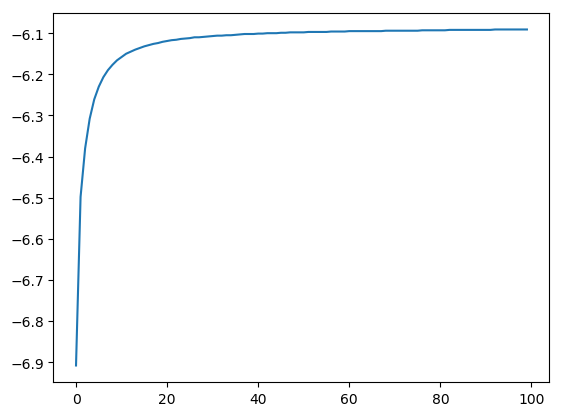

In [62]:
with open('gensim.log', 'w'):
    pass
ldamodel_100 = LdaModel(corpus, num_topics=10, passes = 100)
plt.plot(parse_logfile())
#len(parse_logfile())

In [63]:
for i,topic in ldamodel_100.show_topics(formatted=False,num_words= 10):
    print([dictionary[int(words[0])] for words in topic])

['children', 'people', 'work', 'child', 'know', 'college', 'help', 'parents', 'need', 'way']
['new', 'jobs', 'trade', 'congress', 'people', 'work', 'workers', 'help', 'american', 'private']
['america', 'world', 'new', 'people', 'century', 'americans', 'time', 'government', 'economy', 'state']
['tax', 'security', 'social', 'budget', 'cut', 'year', 'percent', 'deficit', 'years', 'cuts']
['people', 'let', 'president', 'america', 'american', 'country', 'congress', 'nation', 'americans', 'thank']
['health', 'welfare', 'care', 'budget', 'federal', 'year', 'reform', 'programs', 'spending', 'system']
['government', 'energy', 'federal', 'administration', 'congress', 'policy', 'economic', 'program', 'new', 'states']
['years', 'crime', 'time', 'america', 'ago', 'women', 'rights', 'year', 'history', 'drugs']
['world', 'peace', 'nations', 'nuclear', 'soviet', 'security', 'united', 'states', 'military', 'international']
['education', 'schools', 'new', 'national', 'children', 'support', 'teachers', '

*The Maximum log liklihood can be used to determine best number of passes while it is seen that log liklihood quickly reaches -6.2 within 10 passes and takes only another 20 or so passes to almost reach -6.1, hence, 30 passes is used at first which would correspond to an elbow method. The 50 pass model shows slight improvements while the 100 pass model is coherent. Terms in the topics are more coherent and unrelated terms as previously seen have now not appeared from the model. The topics can now be easily labelled such as:
Helping children,trade and new jobs,tax cuts and budget deficits,american people,spending on welfare programs,economic policy,womens rights and crime,world peace and soviet nuclear threat,Education.*

<div class="alert alert-info">
    Please read the section ‘General information’ on the ‘Labs’ page of the course website before submitting this notebook!
</div>